# Digit Identification Prediction

In [1]:
#import necessary module
import matplotlib.pyplot as plt
import os
from skimage import transform,io
import pandas as pd
from scipy import misc,ndimage
import numpy as np
from imageio import imread
from sklearn.metrics import accuracy_score

In [2]:
#set a seed value so that we can control our random ness
seed=128
rng=np.random.RandomState(seed)

In [3]:
#to set out directory path
#cheak weather they exists
root_dir=os.path.abspath('C:\..')
data_dir=os.path.join(root_dir,'Users\Shubhamay\Downloads')
os.path.exists(root_dir)
os.path.exists(data_dir)                         

True

In [4]:
#to read our dataset
train=pd.read_csv(os.path.join(data_dir,'Train_degit_identification','train.csv'))
test=pd.read_csv(os.path.join(data_dir,'Test_digit.csv'))
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


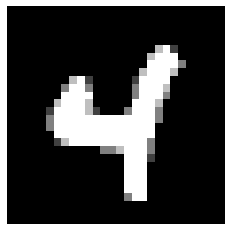

In [6]:
#we read our image let's display it
img_name=rng.choice(train.filename)
filepath=os.path.join(data_dir,'Train_degit_identification','Images','train',img_name)
img=imread(filepath)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [7]:
#lets store our  train images to a numpy array
temp=[]
for img_name in train.filename:
    image_path=os.path.join(data_dir,'Train_degit_identification','Images','train',img_name)
    img=io.imread(image_path,as_gray=True)
    img=img.astype('float32')
    temp.append(img)
train_x=np.stack(temp)

In [8]:
#to check shape of the train_x array
train_x.shape

(49000, 28, 28)

In [18]:
#reshape the shape of the train array 3D to 2D
train_x=np.reshape(train_x,(49000,784))

In [19]:
#to check the shape of train_x array after reshaping
train_x.shape

(49000, 784)

In [9]:
#lets store our test images to a numpy array
temp=[]
for img_name in test.filename:
    image_path=os.path.join(data_dir,'Train_degit_identification','Images','test',img_name)
    img=io.imread(image_path,as_gray=True)
    img=img.astype('float32')
    temp.append(img)
test_x=np.stack(temp)

In [10]:
#to check shape of the test_x array
test_x.shape

(21000, 28, 28)

In [20]:
#reshape the shape of the test_x from 3D to 2D
test_x=np.reshape(test_x,(21000,784))

In [21]:
#to check the shape of the test_x array after reshaping
test_x.shape

(21000, 784)

In [11]:
#to store the lebel of train dataset to train_y array
train_y=train.label.values

In [12]:
#to cheak the shape of train_y array
train_y.shape

(49000,)

In [13]:
#import random forest classifier module for machine learning our array
from sklearn.ensemble import RandomForestClassifier
    

In [14]:

model=RandomForestClassifier()


In [22]:
#fit train_x and train_y array in the machine learning model
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
#to see the score of our model
model.score(train_x,train_y)

1.0

In [28]:
#to made prediction on our test dataset
prediction=model.predict(test_x)

In [29]:
#to create a column in test dataset which contain prediction
test['label']=prediction

In [30]:
#to see out test dataset
test

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9
...,...,...
20995,69995.png,9
20996,69996.png,2
20997,69997.png,6
20998,69998.png,6


In [31]:
#to import test dataset to my file
test.to_csv('Digit Identification Prediction.csv',index=False)